In [22]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [23]:
def hammingDistance(x,y):
    assert x.shape == y.shape

    return sum(el1 != el2 for el1, el2 in zip(x, y))

In [24]:
def ownMatcher(dscp1, dscp2):
    matches = []
    for i, el1 in enumerate(dscp1):
        for j, el2 in enumerate(dscp2):
            matches.append(cv2.DMatch(_distance=int(hammingDistance(el1, el2)),
                                      _imgIdx=0, _queryIdx=i, _trainIdx=j))
                
    return matches

In [25]:
def drawBFMMatch(img1, img2, dscp1, dscp2, kp1, kp2):
      plt.figure(figsize=(25,15)), plt.axis('off')
      
      matches = sorted(cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True).match(dscp1, dscp2), key=lambda x: x.distance)
      match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
      plt.title(f'Use BFM matcher', fontsize=30)
      plt.axis('off')
      plt.imshow(match_img), plt.show()

In [26]:
def drawOwnMatcher(img1, img2, dscp1, dscp2, kp1, kp2):
      plt.figure(figsize=(25,15)), plt.axis('off')
      
      matches = sorted(ownMatcher(dscp1, dscp2), key = lambda x: x.distance)
      match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
      plt.title(f'Use own matcher', fontsize=30)
      plt.axis('off')
      plt.imshow(match_img), plt.show()


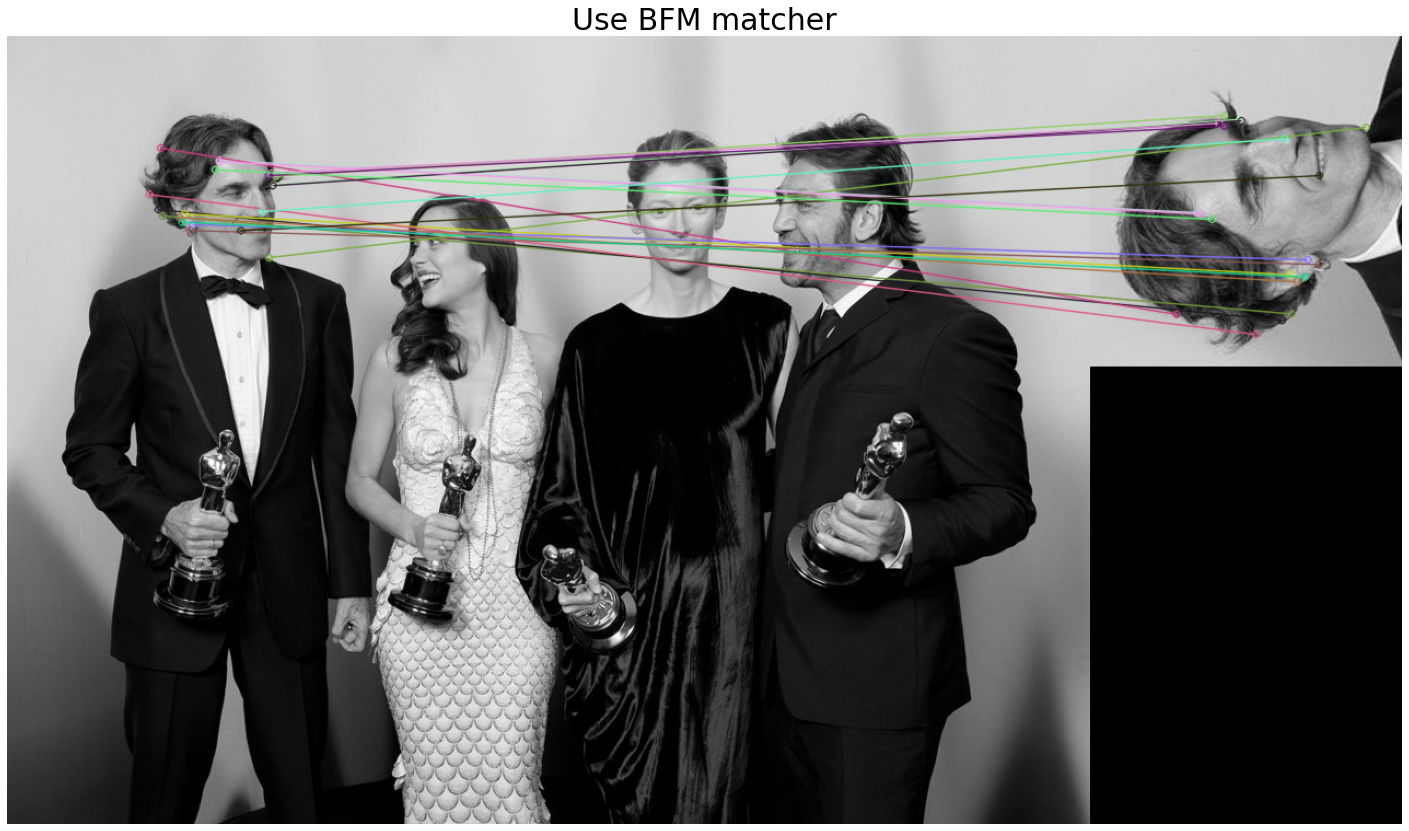

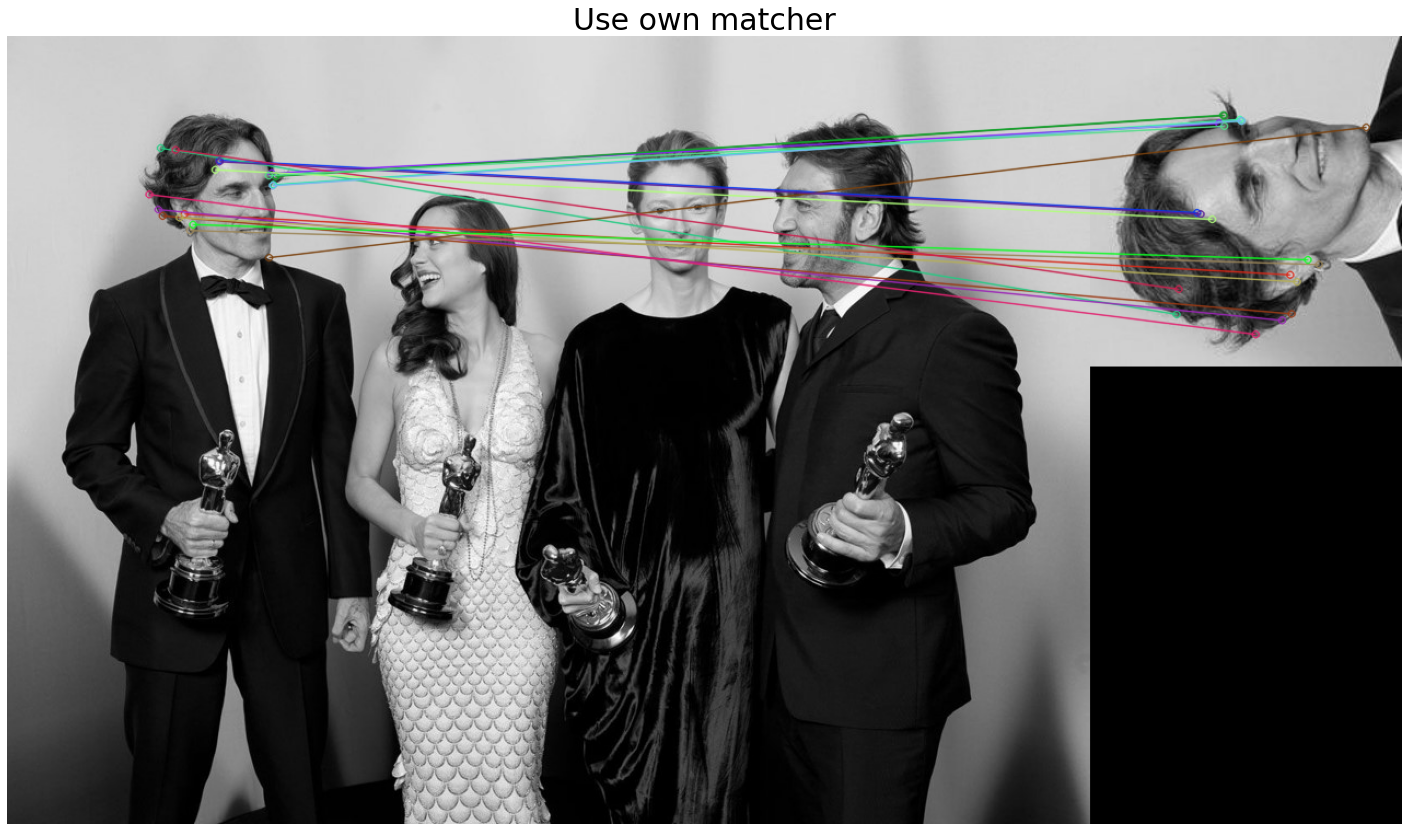

In [27]:
img1 = cv2.imread('sample_data/img1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread('sample_data/img2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

kp1, des1 = cv2.BRISK_create().detectAndCompute(img1, None)
kp2, des2 = cv2.BRISK_create().detectAndCompute(img2, None)

drawBFMMatch(img1, img2, des1, des2, kp1, kp2)
drawOwnMatcher(img1, img2, des1, des2, kp1, kp2)

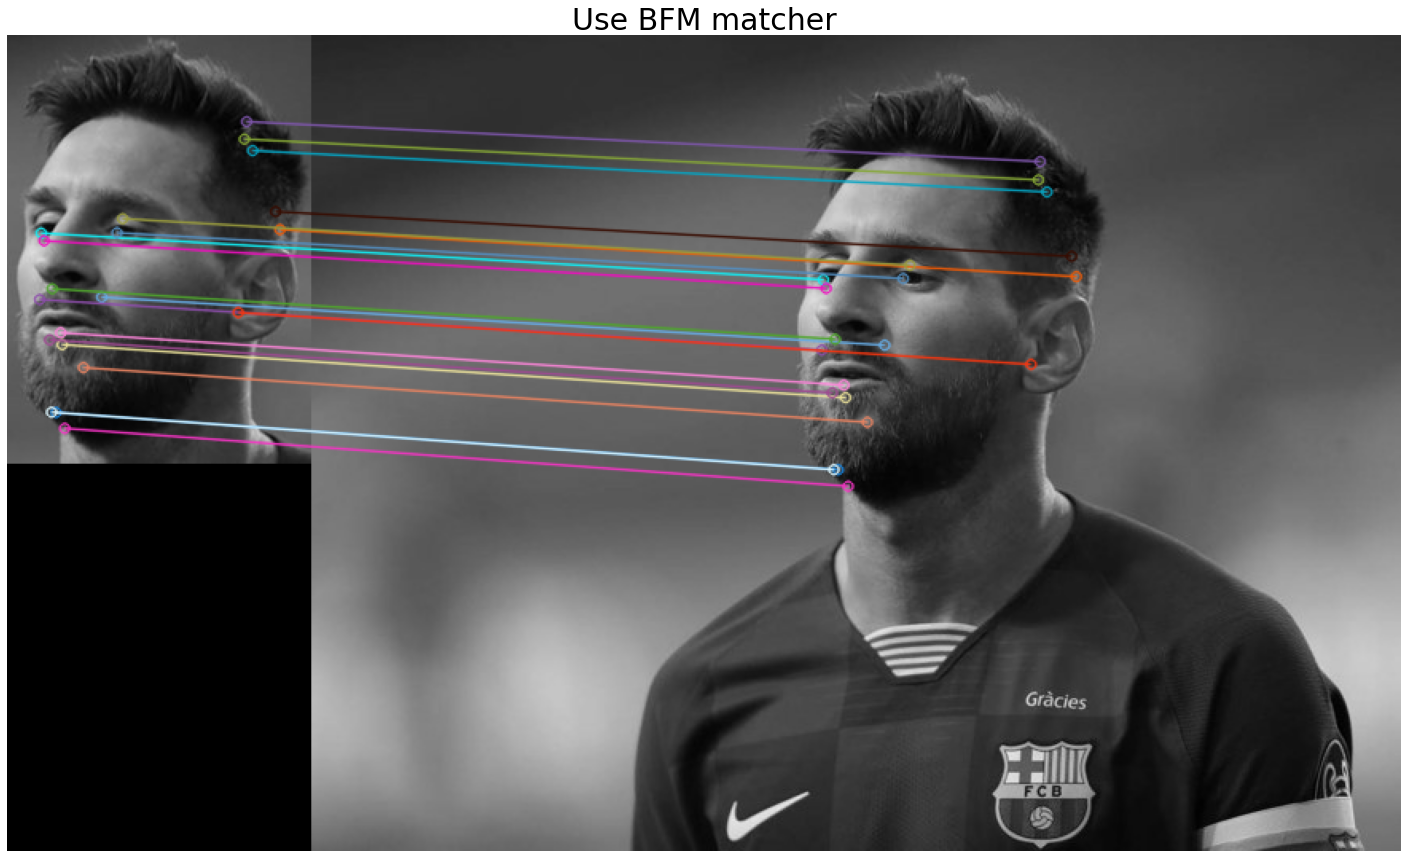

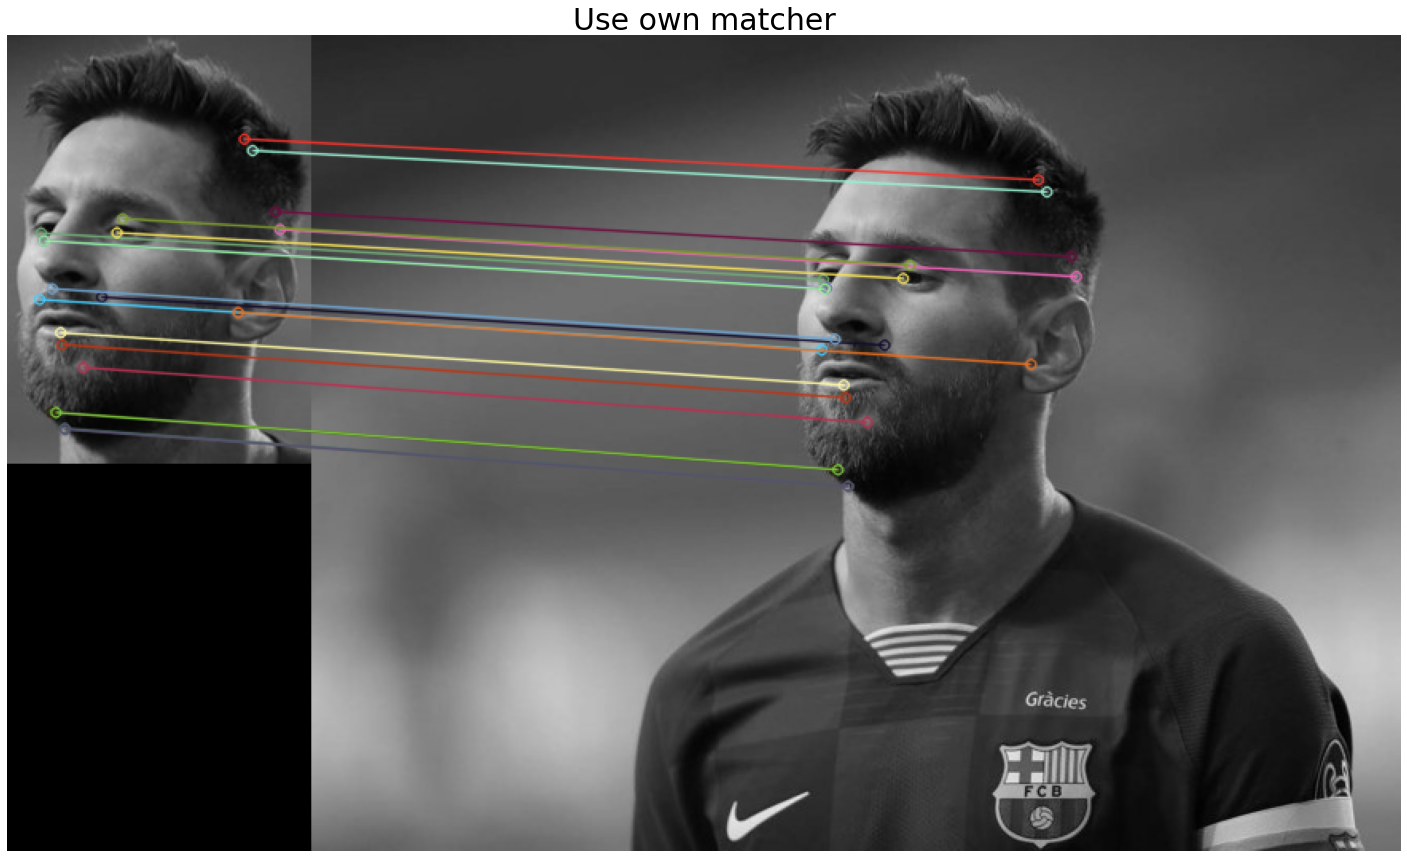

In [28]:
img3 = cv2.imread('sample_data/img3.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

img4 = cv2.imread('sample_data/img4.jpg')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

kp3, des3 = cv2.BRISK_create().detectAndCompute(img3, None)
kp4, des4 = cv2.BRISK_create().detectAndCompute(img4, None)

drawBFMMatch(img3, img4, des3, des4, kp3, kp4)
drawOwnMatcher(img3, img4, des3, des4, kp3, kp4)